Note: I am Using Scipy v1.1.0. In case of any errors you can install scipy 1.1.0 by the following command:
pip install scipy==1.1.0

In [1]:
import scipy
scipy.__version__

'1.1.0'

To download images Click on this url: https://drive.google.com/drive/folders/1pcaTwofZGfoCxZ3Hv2X6vW6xf_1i88eb?usp=sharing

<h1 align="center">Histogram Equalization of Image in Python</h1>

# Import Libraries

In [2]:
from skimage import data
from scipy.misc import imread, imresize
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import math
import cv2

# Original Image

In [3]:
original_image =imread('hist_eq_img.png',False, 'L')    #read image as grey scale image

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


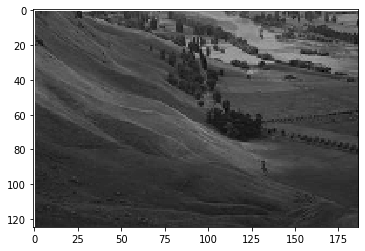

In [4]:
processed_img =original_image.copy()
plt.imshow(processed_img,cmap=plt.cm.gray)

# Finding Probabilities

In [5]:
# first finding PDF
greylevels_original, counts = np.unique(processed_img, return_counts=True)
prob=counts/sum(counts)

In [6]:
# finding CDF
x=0
cdf_prob=[]
for i in prob:
    x=x+i
    cdf_prob.append(x)
x_cdf,y_cdf=greylevels_original.copy(),cdf_prob.copy()

In [7]:
newgreylevels=(np.multiply(cdf_prob,255)) # New Pixel value= CDF*(L-1)

In [8]:
normalized_img=original_image.copy()

In [9]:
# Updating Pixels
mapping=dict(zip(greylevels_original,newgreylevels))
normalized_img=np.vectorize(mapping.get)(normalized_img)

# PDF Histogram

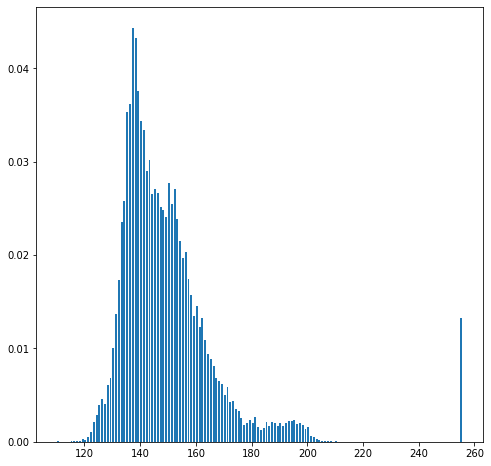

In [10]:
prob_pdf=counts/sum(counts)
x_pdf,y_pdf=greylevels_original,prob_pdf
plt.figure(figsize=(8,8))
plt.bar(x_pdf,y_pdf,align='edge',width=0.7)
plt.show()

# CDF Histogram

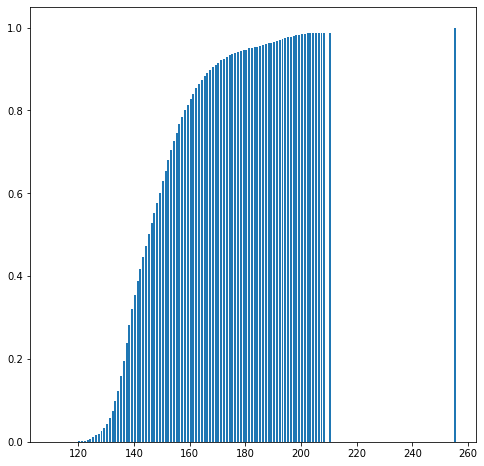

In [11]:
plt.figure(figsize=(8,8))
plt.bar(x_cdf,y_cdf,align='edge',width=0.7)
plt.show()

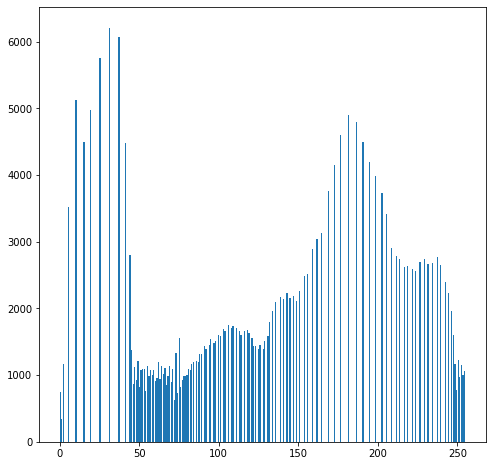

In [12]:
#after histogram equalization Image Histograms Looks Like this
plt.figure(figsize=(8,8))
plt.hist(normalized_img.flatten(),bins=256,range=[0,255],width=0.8)
plt.show()

# Output Image (Equalized_Image)

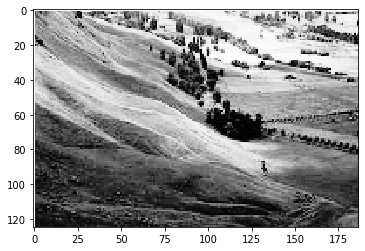

In [12]:
plt.imshow(normalized_img,cmap=plt.cm.gray)

# Equalized Image Histogram

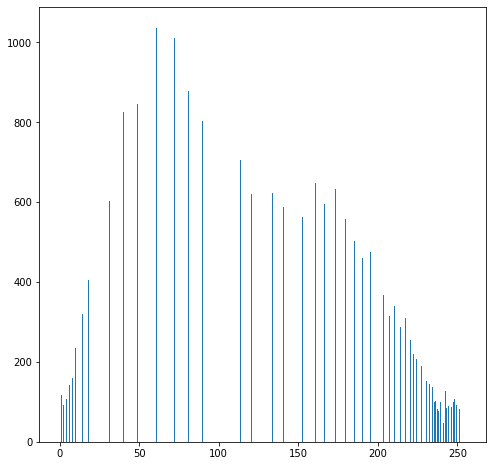

In [15]:
plt.figure(figsize=(8,8))
plt.hist(normalized_img.flatten(),bins=256,range=[0,255],width=0.5)
plt.show()

# Simple Histogram of Original Image

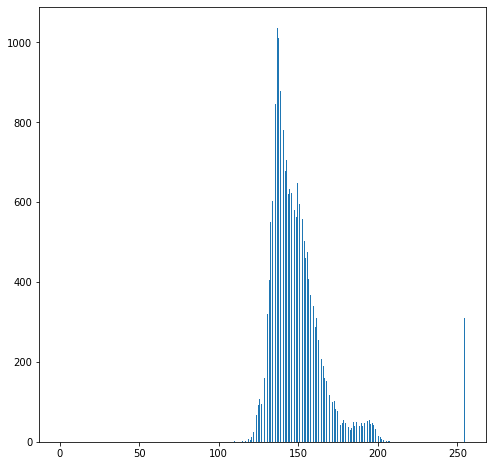

In [13]:
plt.figure(figsize=(8,8))
plt.hist(original_image.flatten(),bins=256,range=[0,255],width=0.5)
plt.show()

# Equalization with Help of  Builtin Function

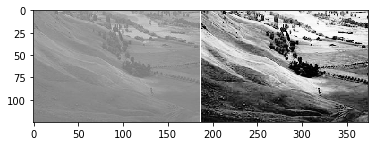

In [14]:
# install cv2 first by following command: pip install opencv-python
equ = cv2.equalizeHist(original_image)
res = np.hstack((original_image,equ)) #stacking images side-by-side
plt.imshow(res,cmap=plt.cm.gray)
plt.show()